In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour  
from imblearn.under_sampling import EditedNearestNeighbours #把多分类改成二分类了
from imblearn.under_sampling import RepeatedEditedNearestNeighbours#把多分类改成二分类了
from imblearn.under_sampling import AllKNN
from imblearn.combine import SMOTEENN
from sklearn.metrics import matthews_corrcoef
import shap
from sklearn.preprocessing import StandardScaler



In [2]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


['Individual Innovation ', 'sleep quality', 'Burnouty', 'Work-Family Conflict', 'Life Satisfaction', 'Scientific and technological personnal questionnaire', 'Post', 'Allocation of working time', 'Job satisfaction', 'Income level', 'Life troubles', 'Professional evaluation', 'Occupational Stress', 'Social capital', 'Organizational climate', 'Professional values', 'Current situation and demand of mental health services', 'Mental Health Literacy', 'Perceived Barriers to Seeking Mental Health Services', 'Psychological Capital', 'Administrative intervention', 'Entrepreneurial attitude', 'BackGround']


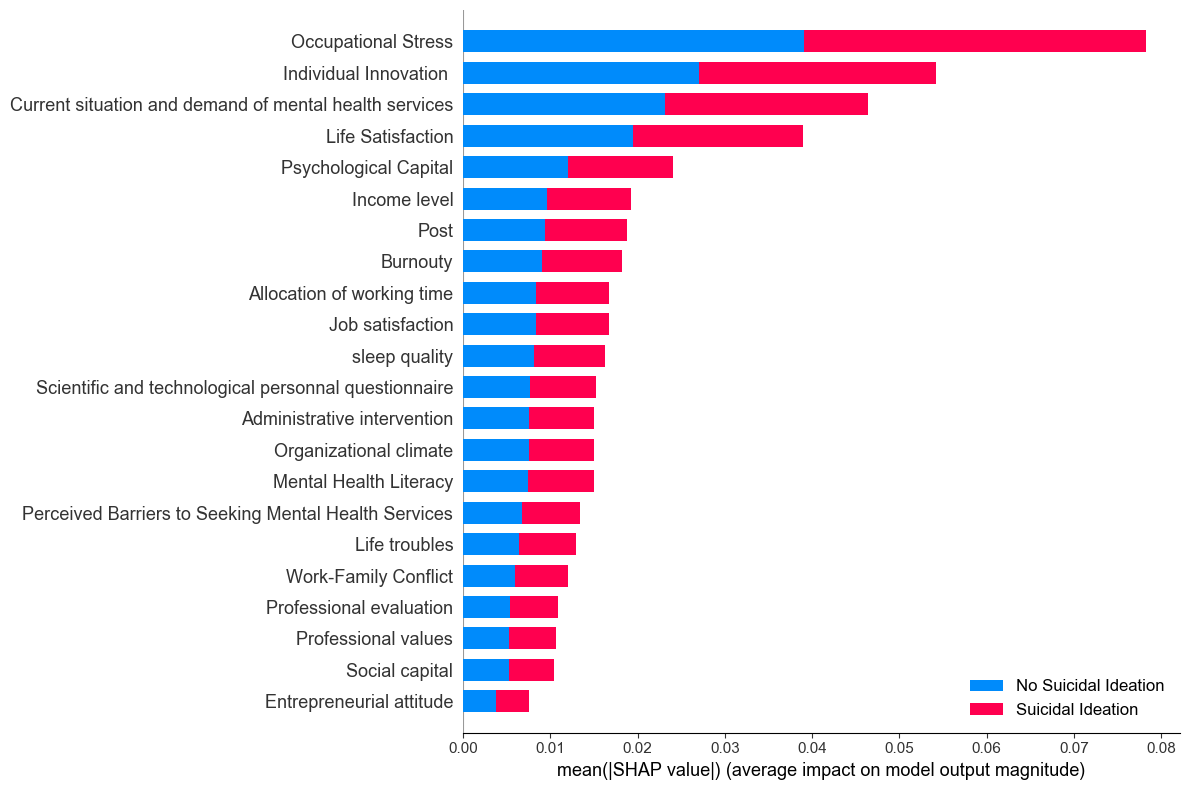

In [34]:
# fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-按量表分组计算后数据.csv"
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据-shap.csv"


Dataset = pd.read_csv(fpath)
number = 40
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
print(names)
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

rfc = RandomForestClassifier(n_estimators=100,random_state=random_state)

rfc.fit(x_train, y_train)
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
class_names = [
     'Suicidal Ideation',
     'No Suicidal Ideation'
]
# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train,max_display=22,plot_size=(12, 8),class_names=class_names)
plt.close()
    


原始数据集类别分布： Counter({0: 6535, 1: 5725, 2: 788, 3: 236})
['Individual Innovation ', 'sleep quality', 'Burnouty', 'Work-Family Conflict', 'Life Satisfaction', 'Scientific and technological personnal questionnaire', 'Post', 'Allocation of working time', 'Job satisfaction', 'Income level', 'Life troubles', 'Professional evaluation', 'Occupational Stress', 'Social capital', 'Organizational climate', 'Professional values', 'Current situation and demand of mental health services', 'Mental Health Literacy', 'Perceived Barriers to Seeking Mental Health Services', 'Psychological Capital', 'Administrative intervention', 'Entrepreneurial attitude', 'BackGround']
[0 1 2 3]


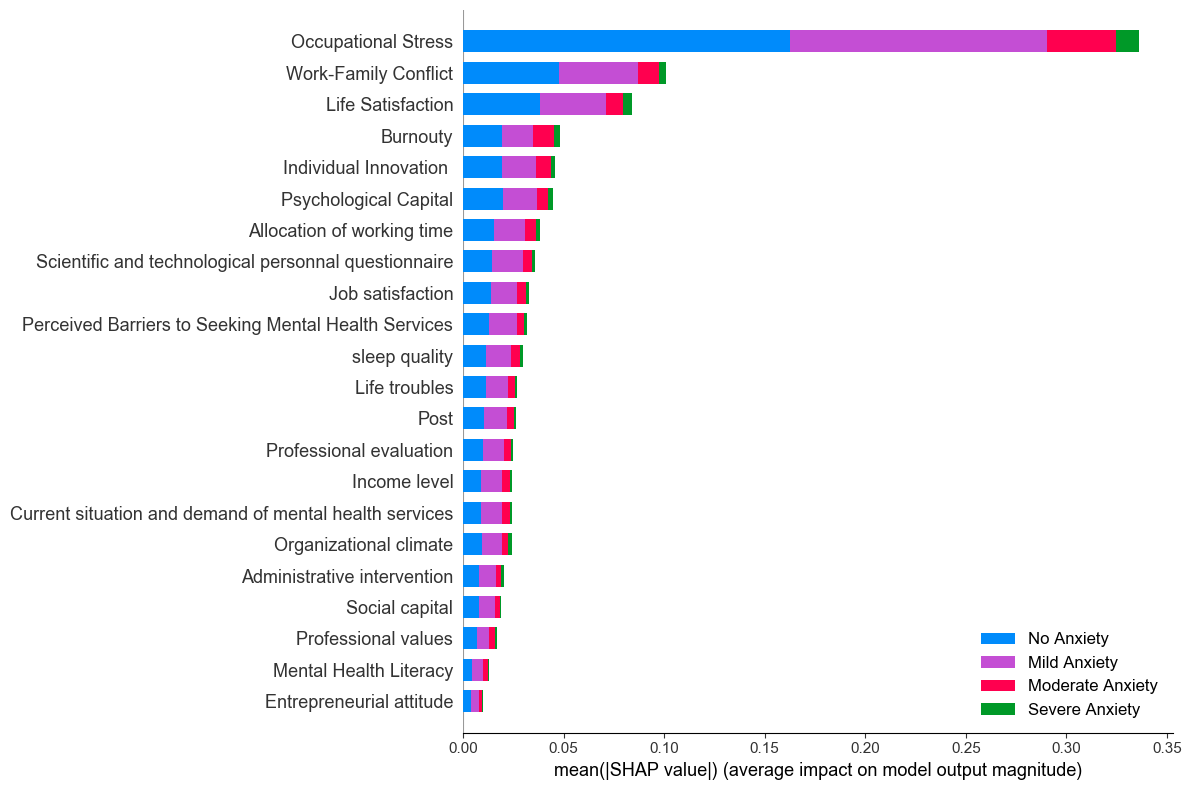

In [33]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据-shap.csv"

Dataset = pd.read_csv(fpath)
number = 23
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('suicide', axis=1)
y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)
print('原始数据集类别分布：', Counter(y))
feature_names = np.array(x.columns)

names = x.columns
names = list(names)
print(names)

random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

rfc = RandomForestClassifier(n_estimators=100,random_state=random_state)

rfc.fit(x_train, y_train)
print(rfc.classes_)

%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
class_names = [
     'No Anxiety',
     'Mild Anxiety',
     'Moderate Anxiety',
     'Severe Anxiety'
]
# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train,max_display=22,plot_size=(12, 8),class_names=class_names)
plt.close()
    



原始数据集类别分布： Counter({0: 101, 1: 11, 2: 2})
[0 1 2]
特征重要性：
                                         feature_name  importance
12                                Occupational Stress    0.099664
9                                        Income level    0.054566
2                                            Burnouty    0.051444
8                                    Job satisfaction    0.026956
4                                   Life Satisfaction    0.025756
11                            Professional evaluation    0.024589
16  Current situation and demand of mental health ...    0.021938
22                                         BackGround    0.021209
3                                Work-Family Conflict    0.016550
1                                       sleep quality    0.016255
5   Scientific and technological personnal questio...    0.016032
20                        Administrative intervention    0.013626
17                             Mental Health Literacy    0.012483
10                 

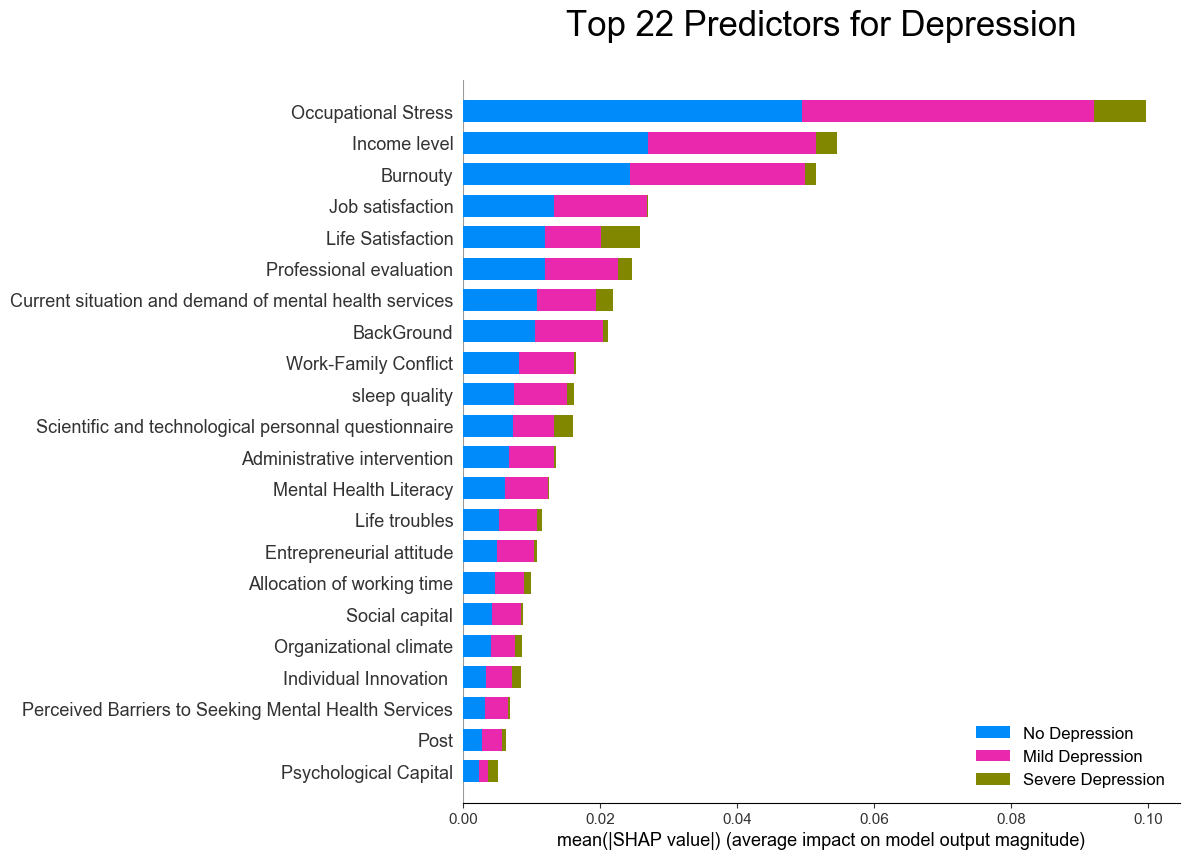

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap

fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-问卷分组计算后数据-shap copy.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['depression']
x = Dataset.drop('depression', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)
x_train = pd.DataFrame(x_train, columns=feature_names)
x_test = pd.DataFrame(x_test, columns=feature_names)

rfc = RandomForestClassifier(n_estimators=100, random_state=random_state)

rfc.fit(x_train, y_train)
print(rfc.classes_)

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)

# 计算特征重要性
feature_importance = np.sum([np.abs(class_shap_values).mean(axis=0) for class_shap_values in shap_values], axis=0)

feature_importance_df = pd.DataFrame(
    {'feature_name': feature_names, 'importance': feature_importance}
)

# 按特征重要性降序排序
sorted_feature_importance_df = feature_importance_df.sort_values(
    by='importance', ascending=False
)
top_features = sorted_feature_importance_df.head(22)

print("特征重要性：")
print(top_features)

class_names = [
    'No Depression',
    'Mild Depression',
    'Severe Depression'
]
plt.subplots()

# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train, max_display=22, plot_size=(12, 8), class_names=class_names,show=False, plot_type='bar')
plt.title('Top 22 Predictors for Depression', fontsize = 25, y = 1.05)
plt.show()

plt.close()

In [36]:
print("Top 30 predictors for Anxiety")

Top 30 predictors for Anxiety
